## 2 Model settings and statistical learning procedure
### 2.3 How to handle high volatility?

*Posterior predictive distribution on some synthetic data*

In [1]:
import os
os.chdir('../')
from inference_mahmm import *

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, gaussian_kde

In [2]:
T = 1000
ν = np.array([.05, .05, 0.9])
Q = np.array([[0.8, 0.05, 0.15],[0.05, 0.8, 0.15],[0.025, 0.025, 0.95]])
M = np.array([-0.04, 0, 0.02])
Σs = [0.01, 0.02, 0.03, 0.06]

n_iter, n_burnin = 1500, 500

palette = sns.color_palette("husl", 3)

##### Three-state model

  0%|          | 0/1500 [00:00<?, ?it/s]

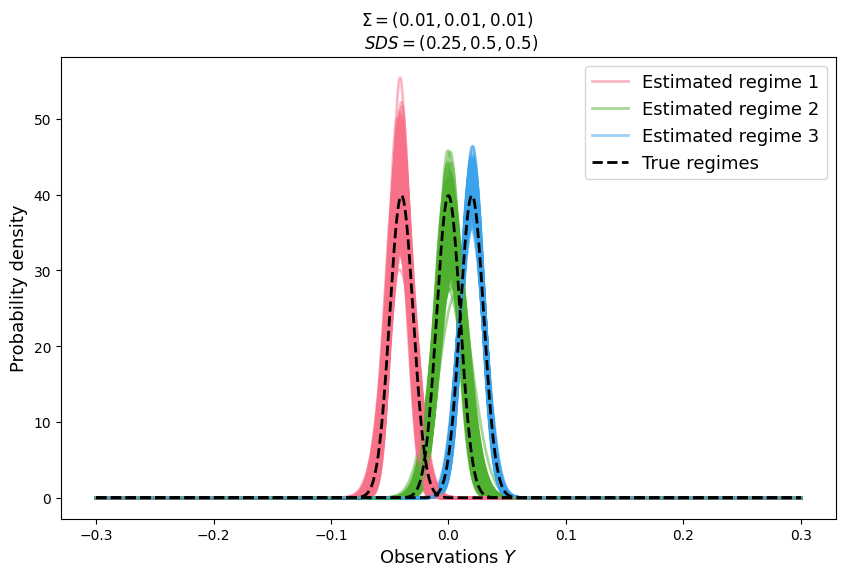

  0%|          | 0/1500 [00:00<?, ?it/s]

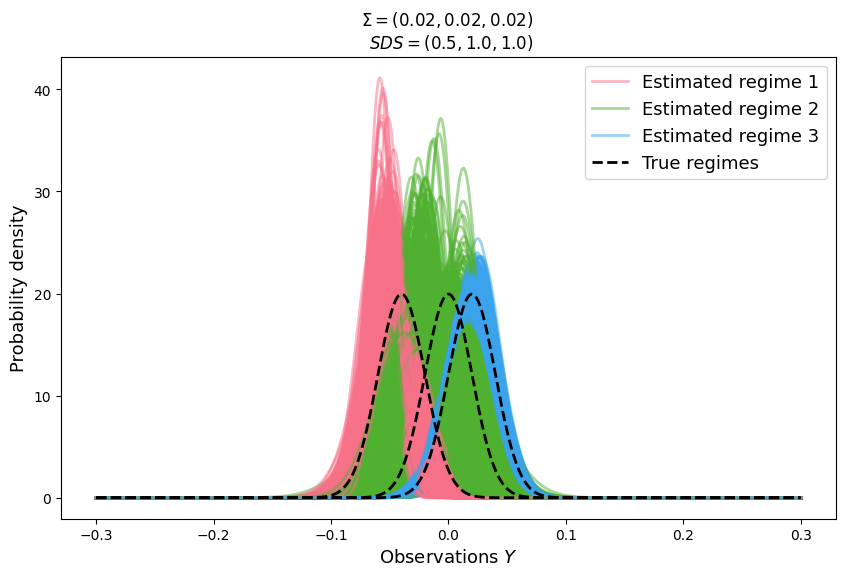

  0%|          | 0/1500 [00:00<?, ?it/s]

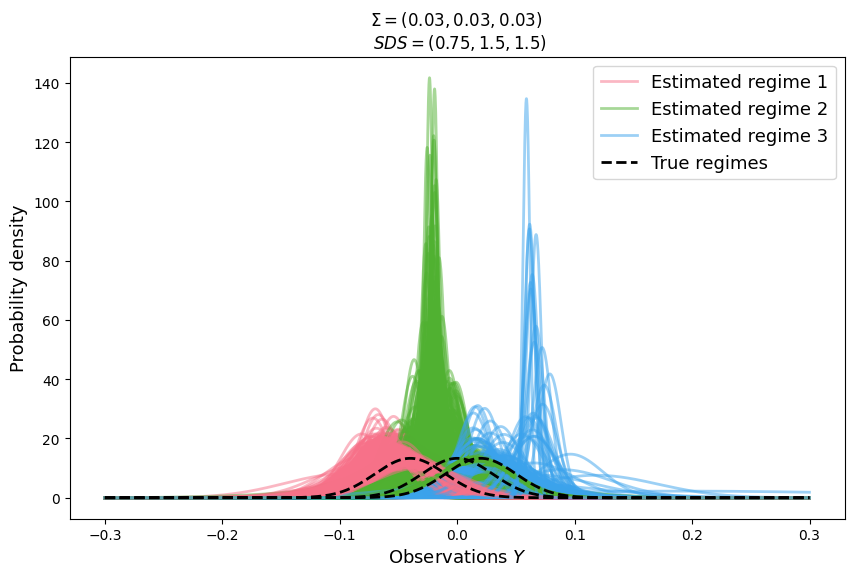

  0%|          | 0/1500 [00:00<?, ?it/s]

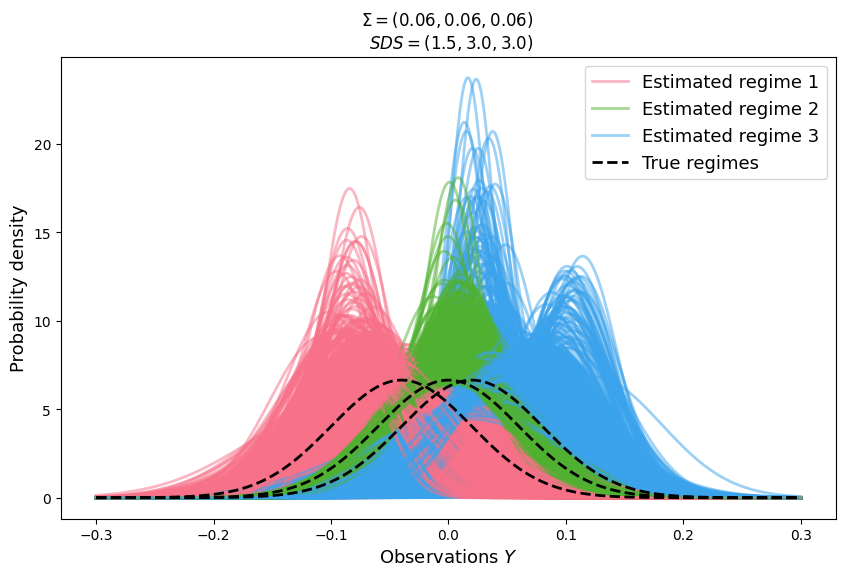

In [3]:
K = 3

for σ in Σs:
    Σ = np.ones(len(ν))*σ
    HMM = ma_hmm(ν, Q, M, Σ, T, 0)
    HMM.simul(seed=121)
    
    GIBBS = gibbs(K, 0, len(HMM.true_y_is)/len(HMM.true_y), HMM.true_y)
    GIBBS.algorithm(n_iter, n_burnin)
        
    x = np.arange(-0.3, 0.3, 0.0001)
    fig, ax = plt.subplots(figsize=(10,6))
    for k in GIBBS.res.keys():
        for i in range(GIBBS.K):
            if k == list(GIBBS.res.keys())[0]:
                ax.plot(x, norm.pdf(x, GIBBS.res[k]['M'][i], GIBBS.res[k]['Σ'][i]), color=palette[i], linewidth=2, alpha=0.5, label=f'Estimated regime {i+1}')
            elif k < list(GIBBS.res.keys())[-1]:
                plt.plot(x, norm.pdf(x, GIBBS.res[k]['M'][i], GIBBS.res[k]['Σ'][i]), color=palette[i], linewidth=2, alpha=0.5)   
            else:
                plt.plot(x, norm.pdf(x, GIBBS.res[k]['M'][i], GIBBS.res[k]['Σ'][i]), color=palette[i], linewidth=2, alpha=0.5)

    for i in range(len(M)):
        if i == 0:
            ax.plot(x, norm.pdf(x, M[i], Σ[i]), '--', color='black', linewidth=2, label=f'True regimes')
        else:
            ax.plot(x, norm.pdf(x, M[i], Σ[i]), '--', color='black', linewidth=2)

    ax.set_xlabel('Observations $Y$', fontsize="13")
    ax.set_ylabel('Probability density', fontsize="13")
    M_mindiff = [np.min(np.abs(M[0]-M[1:])), np.min(np.abs(M[1]-M[[0,2]])), np.min(np.abs(M[2]-M[:-1]))]
    ax.set_title(f'$Σ = ({σ}, {σ}, {σ})$ \n $SDS = ({σ/M_mindiff[0]}, {σ/M_mindiff[1]}, {σ/M_mindiff[2]})$')
    ax.legend(loc=1, fontsize="13")
    plt.show()

##### Two-state model

  0%|          | 0/1500 [00:00<?, ?it/s]

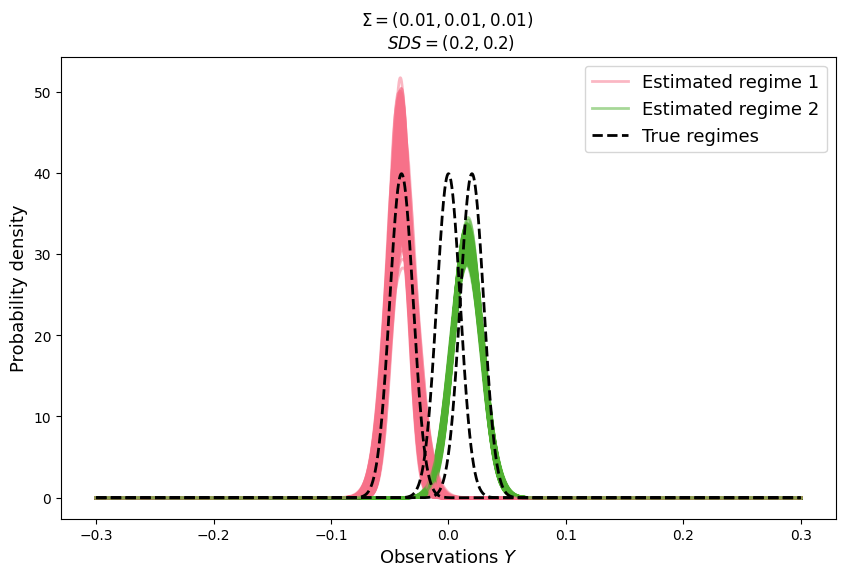

  0%|          | 0/1500 [00:00<?, ?it/s]

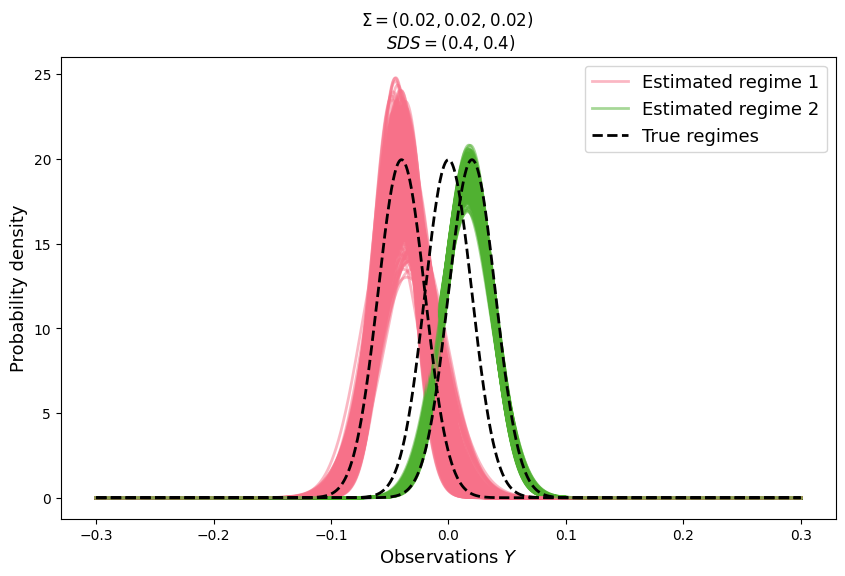

  0%|          | 0/1500 [00:00<?, ?it/s]

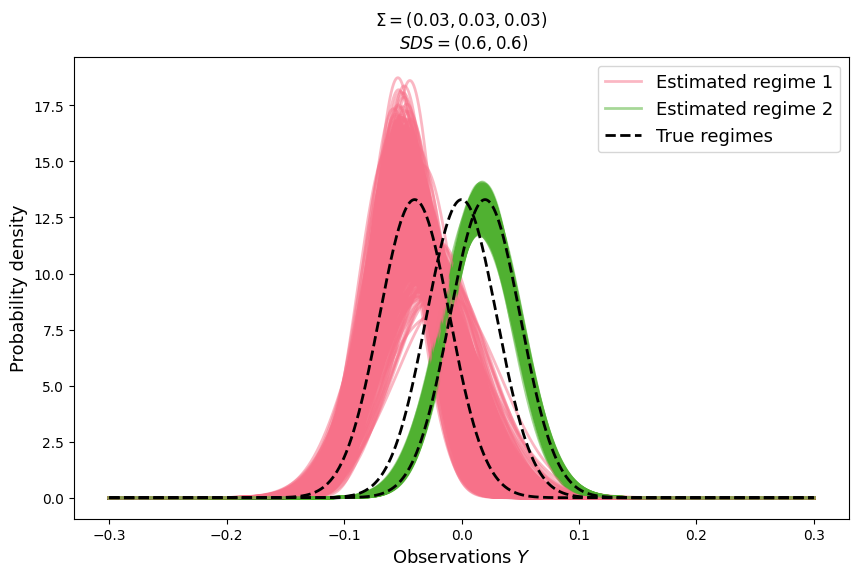

  0%|          | 0/1500 [00:00<?, ?it/s]

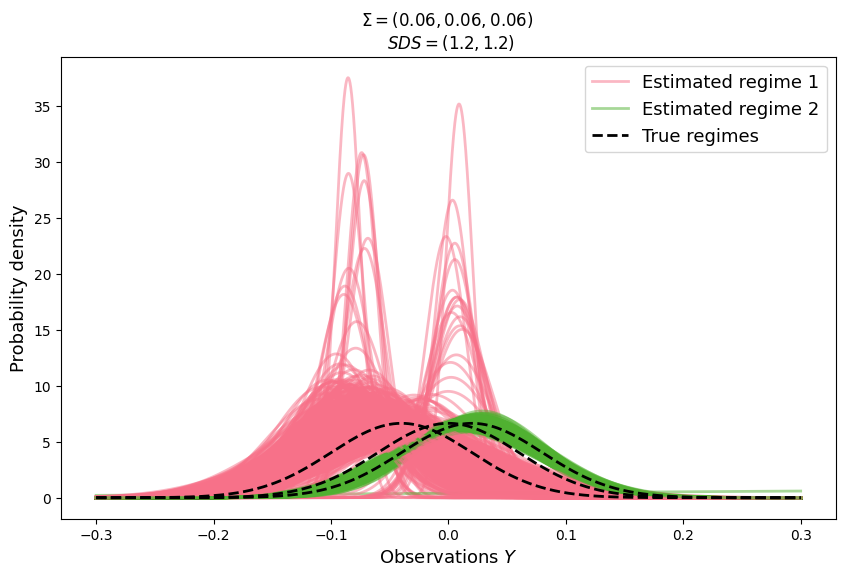

In [4]:
K = 2

for σ in Σs:
    Σ = np.ones(len(ν))*σ
    HMM = ma_hmm(ν, Q, M, Σ, T, 0)
    HMM.simul(seed=121)
    
    GIBBS = gibbs(K, 0, len(HMM.true_y_is)/len(HMM.true_y), HMM.true_y)
    GIBBS.algorithm(n_iter, n_burnin)
        
    x = np.arange(-0.3, 0.3, 0.0001)
    fig, ax = plt.subplots(figsize=(10,6))
    for k in GIBBS.res.keys():
        for i in range(GIBBS.K):
            if k == list(GIBBS.res.keys())[0]:
                ax.plot(x, norm.pdf(x, GIBBS.res[k]['M'][i], GIBBS.res[k]['Σ'][i]), color=palette[i], linewidth=2, alpha=0.5, label=f'Estimated regime {i+1}')
            elif k < list(GIBBS.res.keys())[-1]:
                plt.plot(x, norm.pdf(x, GIBBS.res[k]['M'][i], GIBBS.res[k]['Σ'][i]), color=palette[i], linewidth=2, alpha=0.5)   
            else:
                plt.plot(x, norm.pdf(x, GIBBS.res[k]['M'][i], GIBBS.res[k]['Σ'][i]), color=palette[i], linewidth=2, alpha=0.5)

    for i in range(len(M)):
        if i == 0:
            ax.plot(x, norm.pdf(x, M[i], Σ[i]), '--', color='black', linewidth=2, label=f'True regimes')
        else:
            ax.plot(x, norm.pdf(x, M[i], Σ[i]), '--', color='black', linewidth=2)

    ax.set_xlabel('Observations $Y$', fontsize="13")
    ax.set_ylabel('Probability density', fontsize="13")
    M2 = np.array([M[0], (M[1]+M[2])/2])
    M_mindiff = [np.min(np.abs(M2[0]-M2[1:])), np.min(np.abs(M2[1]-M2[:-1]))]
    ax.set_title(f'$Σ = ({σ}, {σ}, {σ})$ \n $SDS = ({np.round(σ/M_mindiff[0],2)}, {np.round(σ/M_mindiff[1],2)})$')
    ax.legend(loc=1, fontsize="13")
    plt.show()

##### One-state model

  0%|          | 0/1500 [00:00<?, ?it/s]

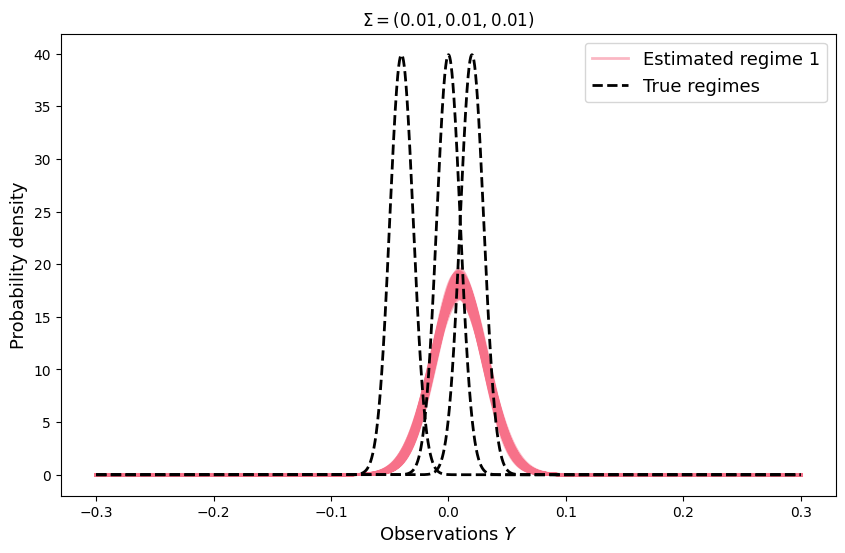

  0%|          | 0/1500 [00:00<?, ?it/s]

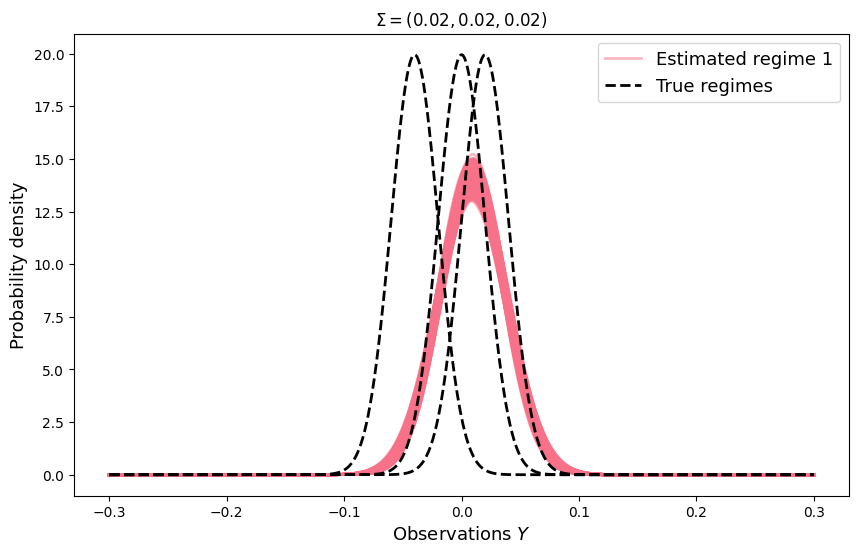

  0%|          | 0/1500 [00:00<?, ?it/s]

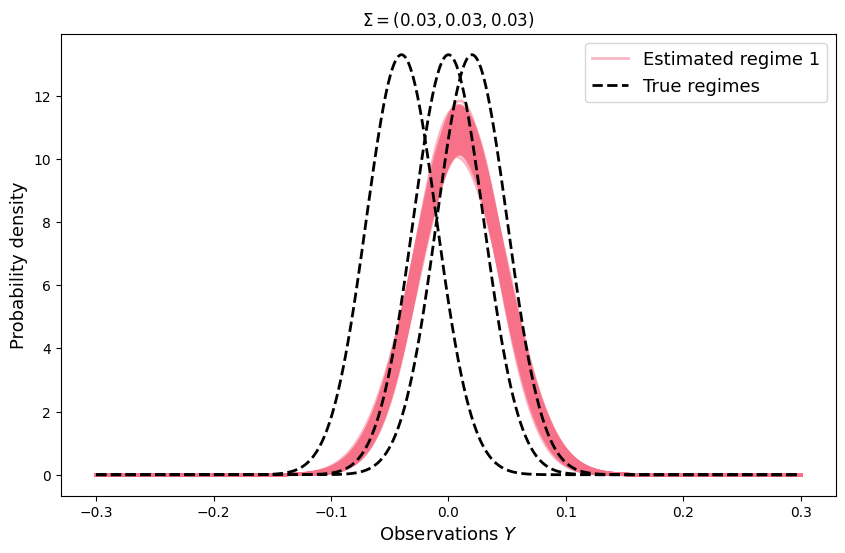

  0%|          | 0/1500 [00:00<?, ?it/s]

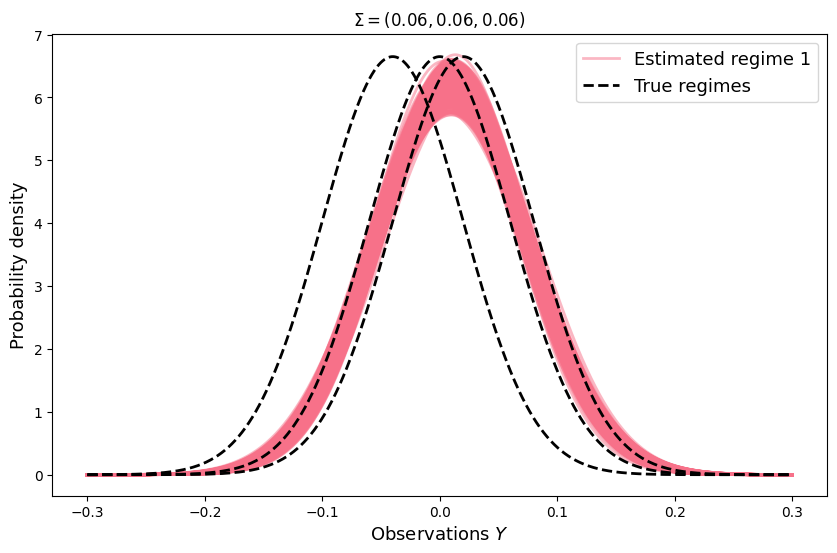

In [5]:
K = 1

for σ in Σs:
    Σ = np.ones(len(ν))*σ
    HMM = ma_hmm(ν, Q, M, Σ, T, 0)
    HMM.simul(seed=121)
    
    GIBBS = gibbs(K, 0, len(HMM.true_y_is)/len(HMM.true_y), HMM.true_y)
    GIBBS.algorithm(n_iter, n_burnin)
        
    x = np.arange(-0.3, 0.3, 0.0001)
    fig, ax = plt.subplots(figsize=(10,6))
    for k in GIBBS.res.keys():
        for i in range(GIBBS.K):
            if k == list(GIBBS.res.keys())[0]:
                ax.plot(x, norm.pdf(x, GIBBS.res[k]['M'][i], GIBBS.res[k]['Σ'][i]), color=palette[i], linewidth=2, alpha=0.5, label=f'Estimated regime {i+1}')
            elif k < list(GIBBS.res.keys())[-1]:
                plt.plot(x, norm.pdf(x, GIBBS.res[k]['M'][i], GIBBS.res[k]['Σ'][i]), color=palette[i], linewidth=2, alpha=0.5)   
            else:
                plt.plot(x, norm.pdf(x, GIBBS.res[k]['M'][i], GIBBS.res[k]['Σ'][i]), color=palette[i], linewidth=2, alpha=0.5)

    for i in range(len(M)):
        if i == 0:
            ax.plot(x, norm.pdf(x, M[i], Σ[i]), '--', color='black', linewidth=2, label=f'True regimes')
        else:
            ax.plot(x, norm.pdf(x, M[i], Σ[i]), '--', color='black', linewidth=2)

    ax.set_xlabel('Observations $Y$', fontsize="13")
    ax.set_ylabel('Probability density', fontsize="13")
    ax.set_title(f'$Σ = ({σ}, {σ}, {σ})$')
    ax.legend(loc=1, fontsize="13")
    plt.show()